# Usage for parse ground truth file and show
This is a demo for parse, visulize and split the data, the demo use the data in example folder,
but the folder does not neccessaryly include all the categories.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
from DOTA import DOTA
import dota_utils as util
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 20.0)


In [2]:

"""
`example` 文件夹下必须有: 
- `labelTxt`
- `images`
这里目录, 一个放目录，一个放标注
"""
example = DOTA('example')

In [3]:
imgids = example.getImgIds(catNms=['ship', 'storage-tank'])
imgid = imgids[0]
img = example.loadImgs(imgid)[0]

imgids: ['P1234']


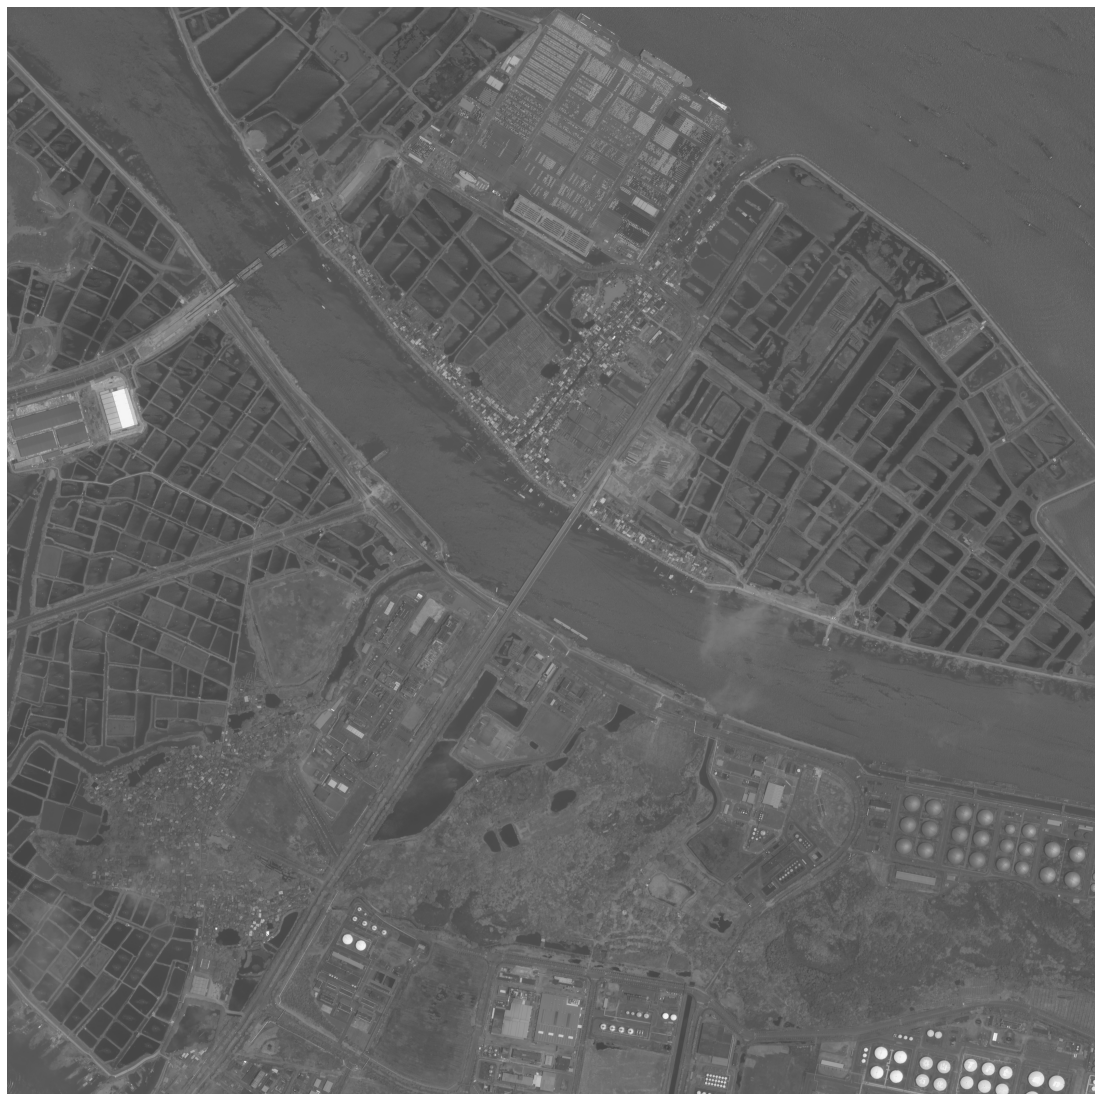

In [4]:
plt.axis('off')

plt.imshow(img)
plt.show()

imgids: ['P1234']


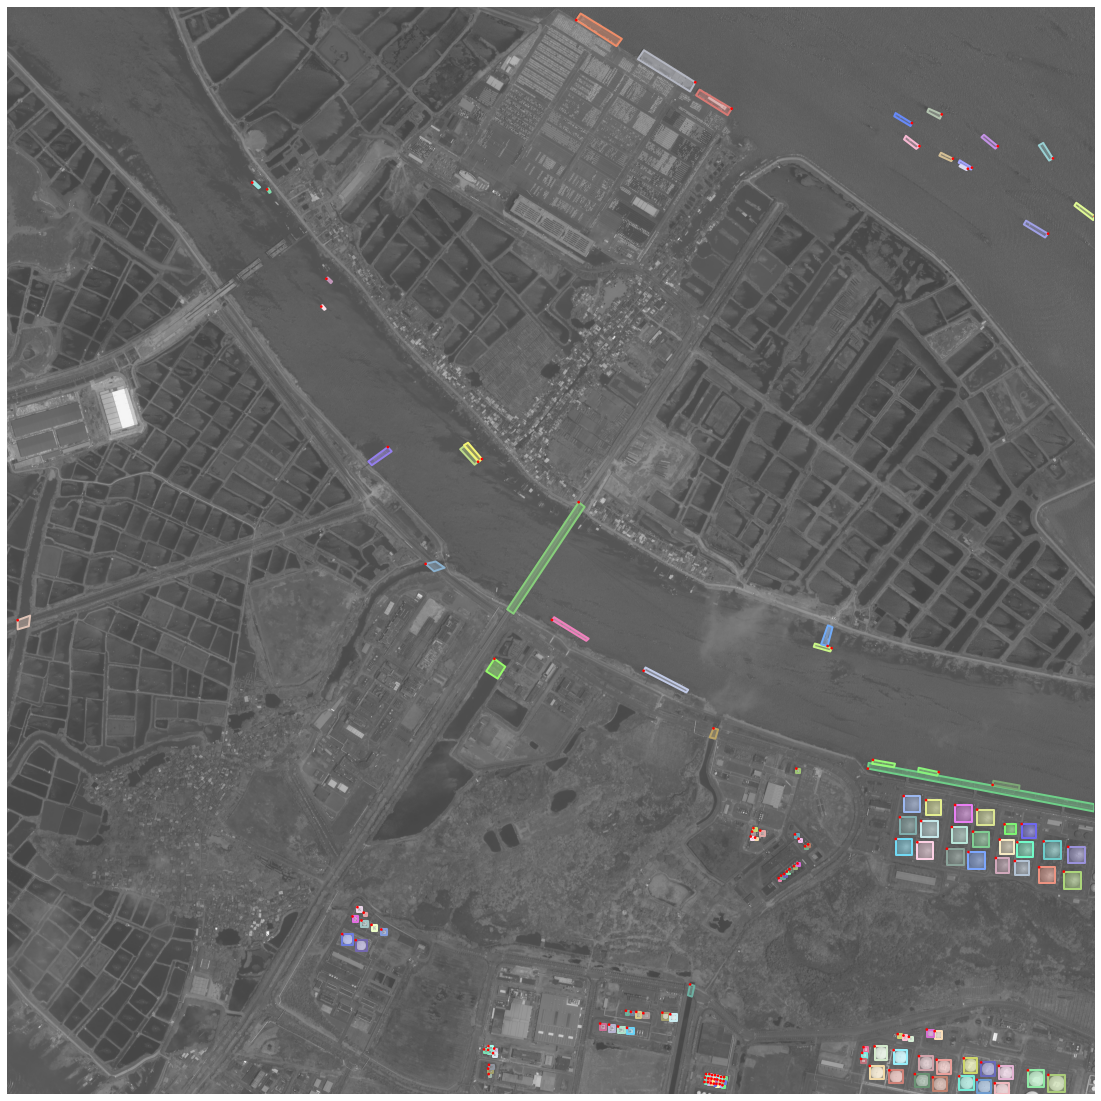

In [5]:
anns = example.loadAnns(imgId=imgid)
# print(anns)
example.showAnns(anns, imgid, 2)

## Split Image And Label
We provide the scale param before split the images and labels.
Sometimes, the instance is too large that it can be easily cut down(for example, ground track filed), in such case you need to set the param "rate" less than 1.

Before going on, first create folder to store the split data
```
  mkdir examplesplit
  mkdir examplesplit/images
  mkdir examplesplit/labelTxt
```
For test images, you only need to split images, refer to "SplitOnlyImage.py"

In [6]:
from ImgSplit import splitbase

In [7]:
split = splitbase(r'example', 
                  r'examplesplit', choosebestpoint=True)
split.splitdata(0.5)
split.splitdata(1)
split.splitdata(2)

In [8]:
examplesplit = DOTA('examplesplit')

In [9]:
imgids = examplesplit.getImgIds(catNms=['plane'])
imgid = imgids[1]
img = examplesplit.loadImgs(imgid)[0]

imgids: ['P1088__2__924___1848']


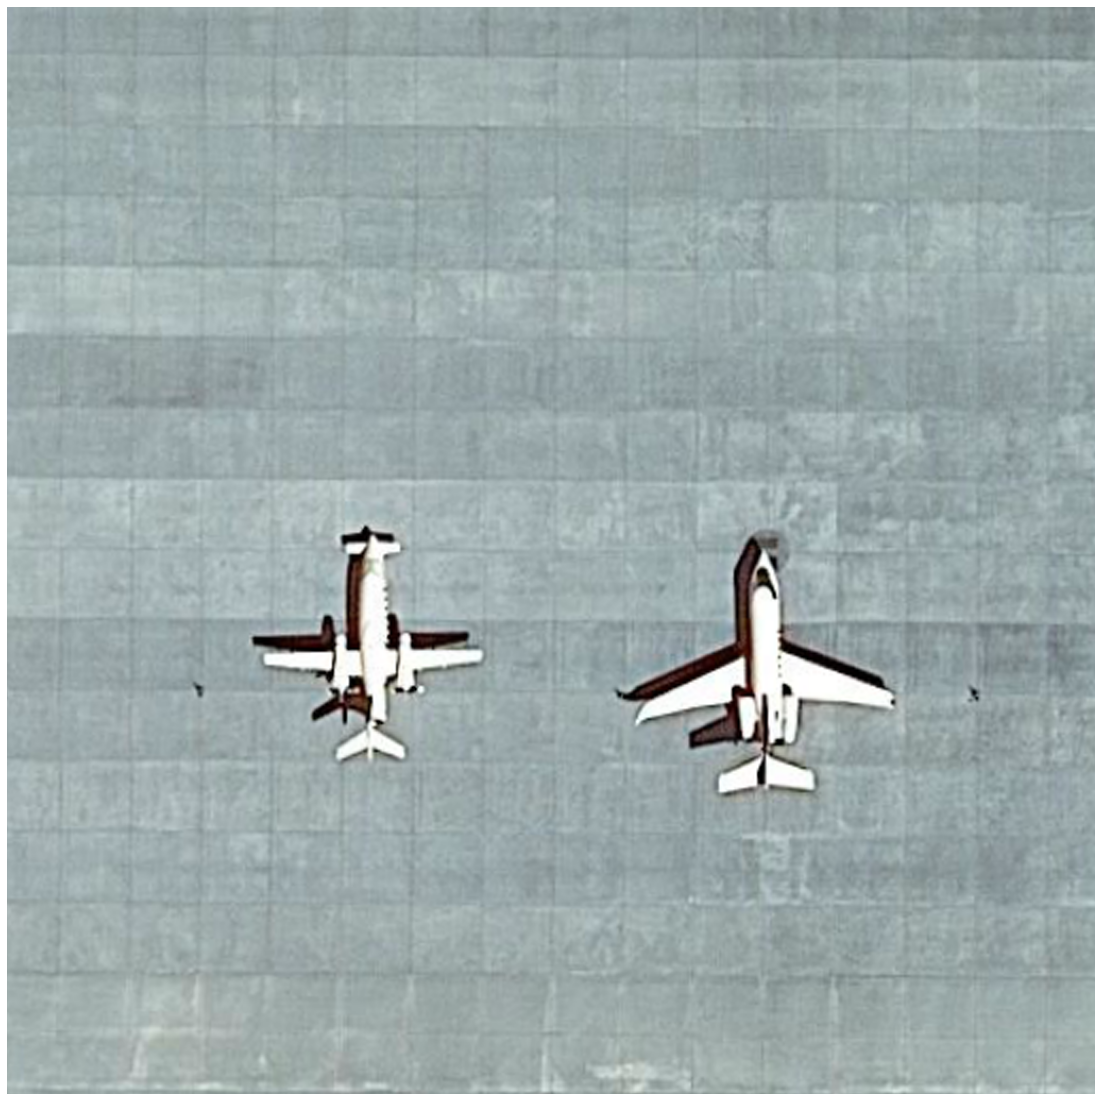

In [10]:
plt.axis('off')

plt.imshow(img)
plt.show()

imgids: ['P1088__2__924___1848']


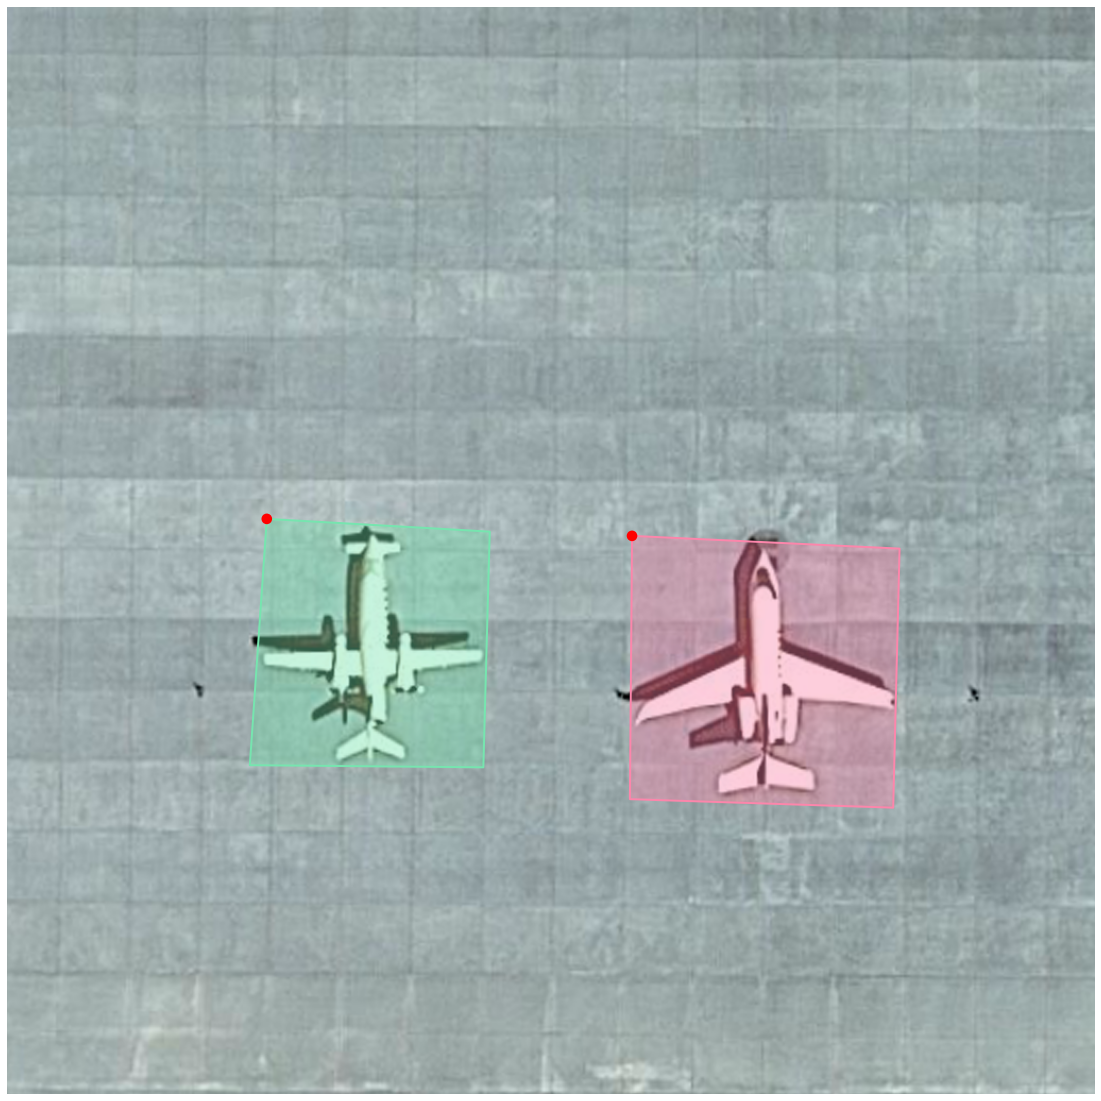

In [11]:
anns = examplesplit.loadAnns(imgId=imgid)
# print(anns)
examplesplit.showAnns(anns, imgid, 2)

## Merge patches
Now, we will merge these patches to see if they can be restored in the initial large images

In [12]:
from ResultMerge import mergebypoly # 用来合并分割小图的结果, 并做NMS

In [19]:
# 创建一个目录, 用来存放15个类的文件, 每个文件存放这分割小图的标注/预测结果
if not os.path.exists(r'Task1'):
    os.makedirs(r'Task1')
# 将 GT 转化为 obb 结果
util.groundtruth2Task1(r'examplesplit/labelTxt',
                       r'Task1')

# 创建一个目录, 用来存放15个类的文件, 此时每个类文件, 分割小图的结果已经被合并, 且做了NMS
if not os.path.exists(r'Task1_merge'):
    os.makedirs(r'Task1_merge')

# 合并小图的结果
mergebypoly(r'Task1',
            r'Task1_merge')


# 创建一个目录, 用来存放15个类的文件, 此时每个类文件, 分割小图的结果已经被合并, 且做了NMS
if not os.path.exists(r'restoredexample/labelTxt'):
    os.makedirs(r'restoredexample/labelTxt')

# 将结果过滤, 并将每个类的文件转化为 ID开头的结果文件
util.Task2groundtruth_poly(r'Task1_merge',
                           r'restoredexample/labelTxt')

In [20]:
filepath = 'example/labelTxt'
imgids = util.GetFileFromThisRootDir(filepath)
imgids = [util.custombasename(x) for x in imgids]
print(imgids)

['P0706', 'P0770', 'P1088', 'P1234', 'P1888', 'P2598', 'P2709']


imgids: ['P1088']


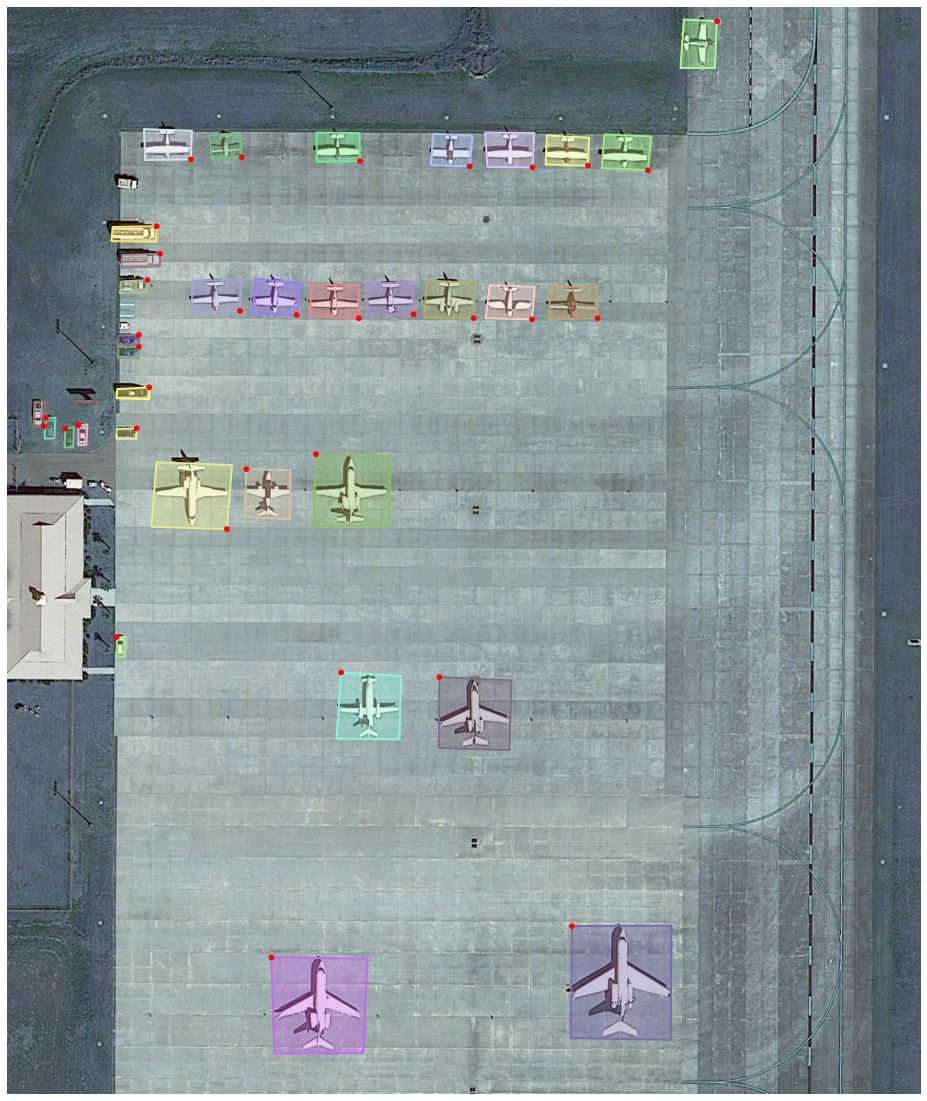

In [21]:
example = DOTA(r'example')
num = 2
anns = example.loadAnns(imgId=imgids[num])
# print(anns)
example.showAnns(anns, imgids[num], 2)

imgids: ['P1088']


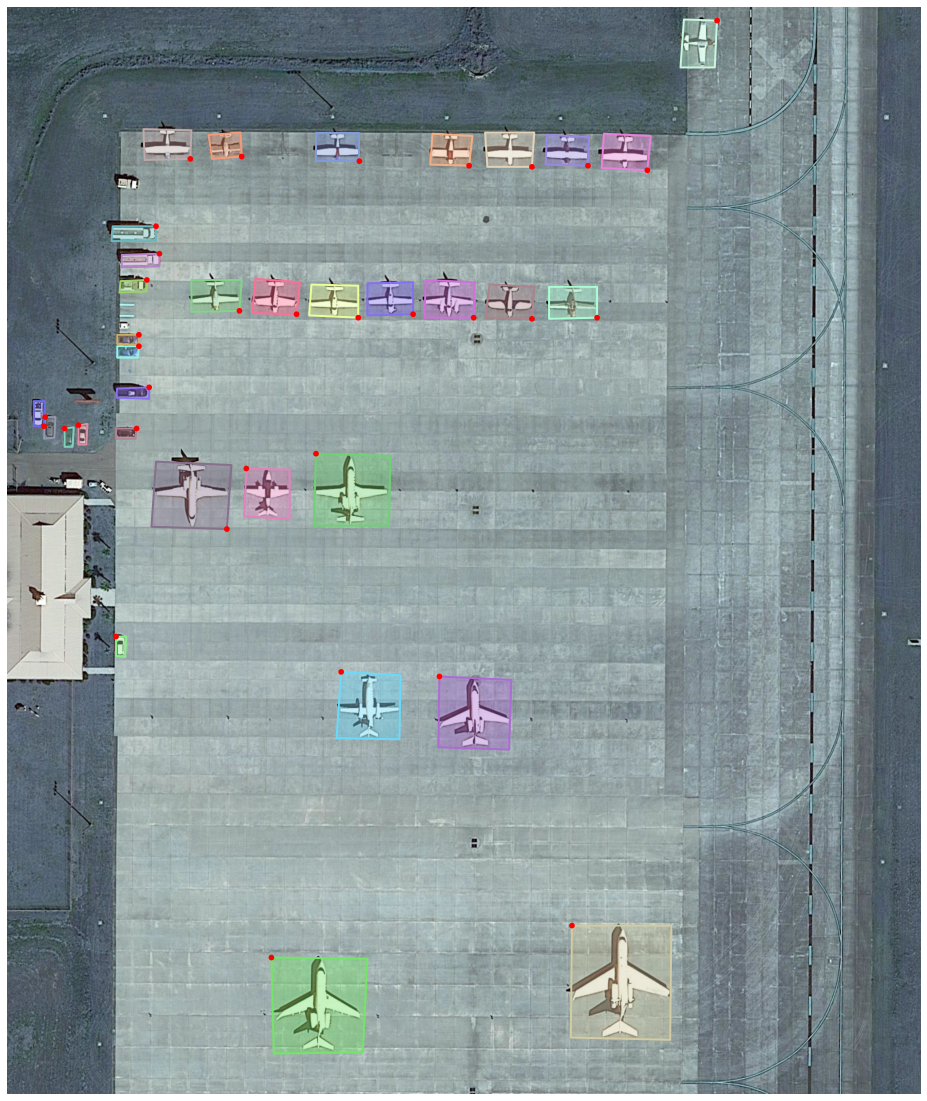

In [22]:
# 直接执行会保存, 需要将 example/images 扔到 restoredexample/images
restored = DOTA(r'restoredexample')
num = 2
anns = restored.loadAnns(imgId=imgids[num])
# print(anns)
restored.showAnns(anns, imgids[num], 2)